## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
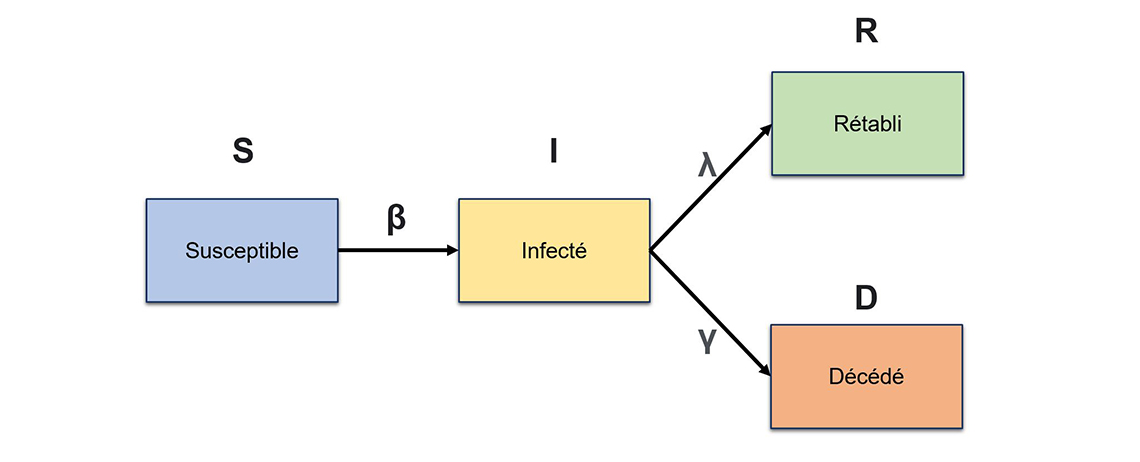


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package dviutils
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,304 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127

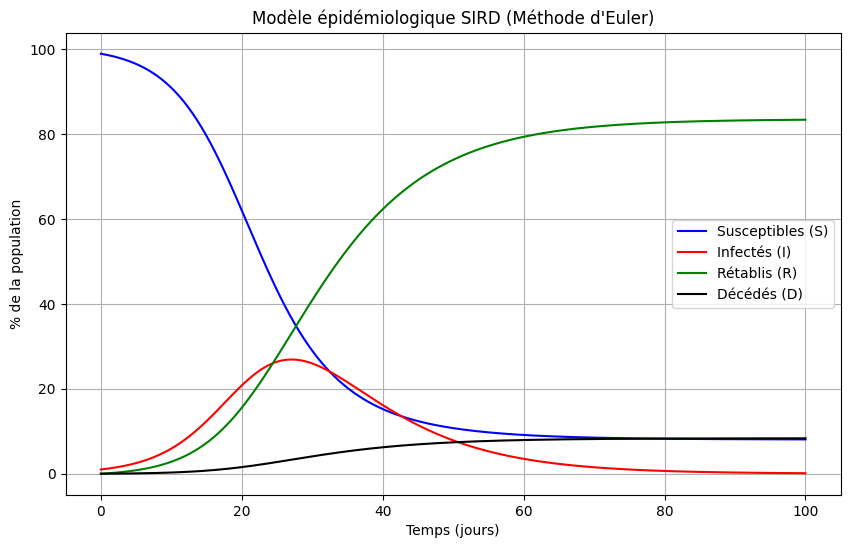

In [2]:
#0 et 1
!apt-get install texlive-latex-extra texlive-fonts-recommended dviutils
!apt-get update
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
from scipy.interpolate import interp1d

def euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, T):

    # Nombre de pas de simulation
    steps = int(T / dt)

    # Initialisation des tableaux pour les résultats
    S = np.zeros(steps)
    I = np.zeros(steps)
    R = np.zeros(steps)
    D = np.zeros(steps)

    # Initialisation des conditions initiales
    S[0], I[0], R[0], D[0] = S0, I0, R0, D0

    # Simulation avec la méthode d'Euler
    for t in range(steps - 1):
        dS = -beta * S[t] * I[t] / 100
        dI = beta * S[t] * I[t] / 100 - gamma * I[t] - mu * I[t]
        dR = gamma * I[t]
        dD = mu * I[t]

        S[t + 1] = S[t] + dS * dt
        I[t + 1] = I[t] + dI * dt
        R[t + 1] = R[t] + dR * dt
        D[t + 1] = D[t] + dD * dt

    # Tableau des instants temporels
    time = np.linspace(0, T, steps)

    return time, S, I, R, D

if __name__ == "__main__":

    # Paramètres du modèle
    PARAMS = {
        "beta": 0.3,   # Taux de transmission
        "gamma": 0.1,  # Taux de guérison
        "mu": 0.01     # Taux de mortalité
    }

    # Conditions initiales
    INITIAL_CONDITIONS = {
        "S0": 99.0,  # Susceptibles
        "I0": 1.0,   # Infectés
        "R0": 0.0,   # Rétablis
        "D0": 0.0    # Décédés
    }

    # Durée de la simulation et pas de temps
    T = 100       # Nombre total de jours
    dt = 0.01     # Pas de temps

    # Simulation
    time, S, I, R, D = euler_sird(
        beta=PARAMS["beta"],
        gamma=PARAMS["gamma"],
        mu=PARAMS["mu"],
        S0=INITIAL_CONDITIONS["S0"],
        I0=INITIAL_CONDITIONS["I0"],
        R0=INITIAL_CONDITIONS["R0"],
        D0=INITIAL_CONDITIONS["D0"],
        dt=dt,
        T=T
    )

    # Visualisation des résultats
    plt.figure(figsize=(10, 6))
    plt.plot(time, S, label="Susceptibles (S)", color="blue")
    plt.plot(time, I, label="Infectés (I)", color="red")
    plt.plot(time, R, label="Rétablis (R)", color="green")
    plt.plot(time, D, label="Décédés (D)", color="black")
    plt.xlabel("Temps (jours)")
    plt.ylabel("% de la population")
    plt.title("Modèle épidémiologique SIRD (Méthode d'Euler)")
    plt.legend()
    plt.grid()
    plt.show()

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

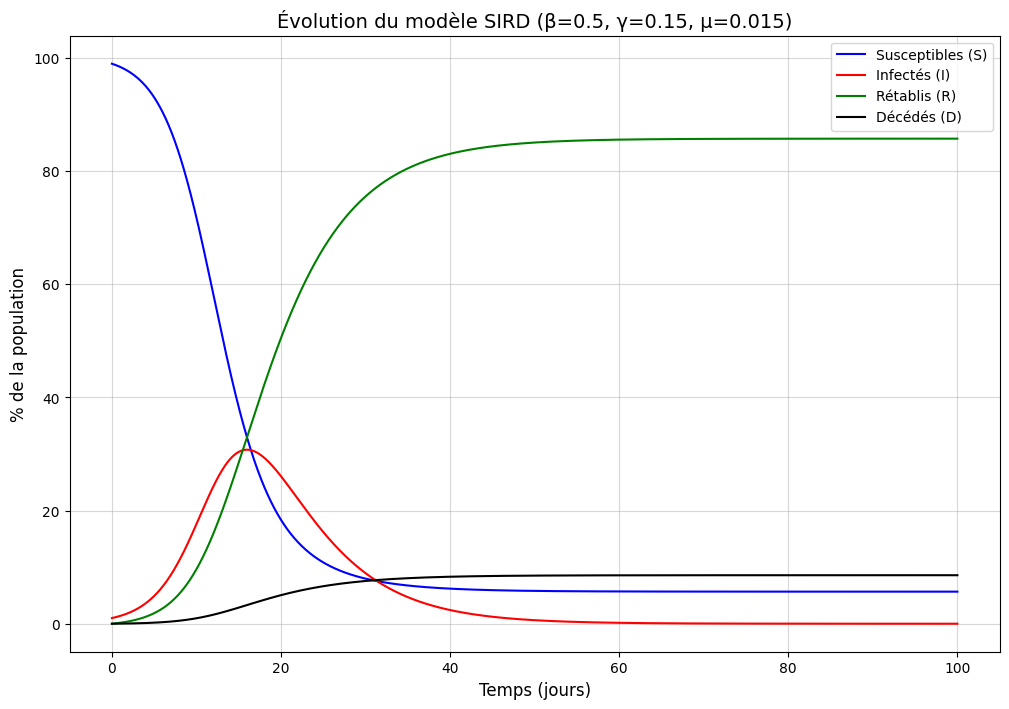

In [3]:
# Paramètres pour la simulation
beta = 0.5  # Taux de transmission
gamma = 0.15  # Taux de guérison
mu = 0.015  # Taux de mortalité

# Conditions initiales
S0 = 99.0  # Pourcentage initial de la population susceptible
I0 = 1.0   # Pourcentage initial de la population infectée
R0 = 0.0   # Pourcentage initial de la population rétablie
D0 = 0.0   # Pourcentage initial de la population décédée

# Pas de temps et durée de simulation
dt = 0.01  # Pas de temps (en jours)
T = 100    # Durée totale de la simulation (en jours)

# Simulation avec les paramètres donnés
time, S, I, R, D = euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, T)

# Tracé des courbes
plt.figure(figsize=(12, 8))
plt.plot(time, S, label="Susceptibles (S)", color="blue")
plt.plot(time, I, label="Infectés (I)", color="red")
plt.plot(time, R, label="Rétablis (R)", color="green")
plt.plot(time, D, label="Décédés (D)", color="black")

# Ajout des labels et légendes
plt.xlabel("Temps (jours)", fontsize=12)
plt.ylabel("% de la population", fontsize=12)
plt.title("Évolution du modèle SIRD (β=0.5, γ=0.15, μ=0.015)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [46]:
#1
def load_sird_data(filepath):
    data = pd.read_csv(filepath)
    return data

# Chemin vers le fichier CSV
file_path = "/content/drive/MyDrive/sird_dataset.csv"

# Chargement des données empiriques
empirical_data = load_sird_data(file_path)

In [47]:
empirical_data.head()

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [48]:
# Renommer les colonnes si nécessaire
empirical_data.rename(columns={
    "Susceptibles": "S",
    "Infectés": "I",
    "Rétablis": "R",
    "Décès": "D"
}, inplace=True)

In [49]:
# Fonction pour calculer le MSE
def euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, T):
    n_steps = int(T / dt)
    S, I, R, D = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps)
    S[0], I[0], R[0], D[0] = S0, I0, R0, D0
    time = np.linspace(0, T, n_steps)

    for t in range(1, n_steps):
        dS = -beta * S[t-1] * I[t-1] * dt
        dI = (beta * S[t-1] * I[t-1] - gamma * I[t-1] - mu * I[t-1]) * dt
        dR = gamma * I[t-1] * dt
        dD = mu * I[t-1] * dt

        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR
        D[t] = D[t-1] + dD

    return time, S, I, R, D

In [50]:
def compute_cost(time, S, I, R, D, empirical_data):
    S_interp = np.interp(empirical_data['Jour'], time, S)
    I_interp = np.interp(empirical_data['Jour'], time, I)
    R_interp = np.interp(empirical_data['Jour'], time, R)
    D_interp = np.interp(empirical_data['Jour'], time, D)

    mse = np.mean((S_interp - empirical_data['S'])**2 +
                  (I_interp - empirical_data['I'])**2 +
                  (R_interp - empirical_data['R'])**2 +
                  (D_interp - empirical_data['D'])**2)
    return mse

In [54]:
import itertools

def grid_search(empirical_data):
    beta_values = np.linspace(0.1, 1.0, 30)
    gamma_values = np.linspace(0.01, 0.99, 30)
    mu_values = np.linspace(0.001, 0.099, 30)

    best_cost = float('inf')
    best_params = None

    param_grid = itertools.product(beta_values, gamma_values, mu_values)

    for beta, gamma, mu in param_grid:
        S0, I0, R0, D0 = empirical_data.iloc[0]['S'], empirical_data.iloc[0]['I'], empirical_data.iloc[0]['R'], empirical_data.iloc[0]['D']
        T = empirical_data['Jour'].max()

        time, S, I, R, D = euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt=0.1, T=T)

        cost = compute_cost(time, S, I, R, D, empirical_data)

        if cost < best_cost:
            best_cost = cost
            best_params = (beta, gamma, mu)

    return best_params, best_cost

# Trouver les meilleurs paramètres
best_params, best_cost = grid_search(empirical_data)
beta_opt, gamma_opt, mu_opt = best_params
print(f"Meilleurs paramètres : beta={beta_opt:.3f}, gamma={gamma_opt:.3f}, mu={mu_opt:.3f} (Coût: {best_cost:.4f})")

Meilleurs paramètres : beta=0.348, gamma=0.111, mu=0.011 (Coût: 0.0010)


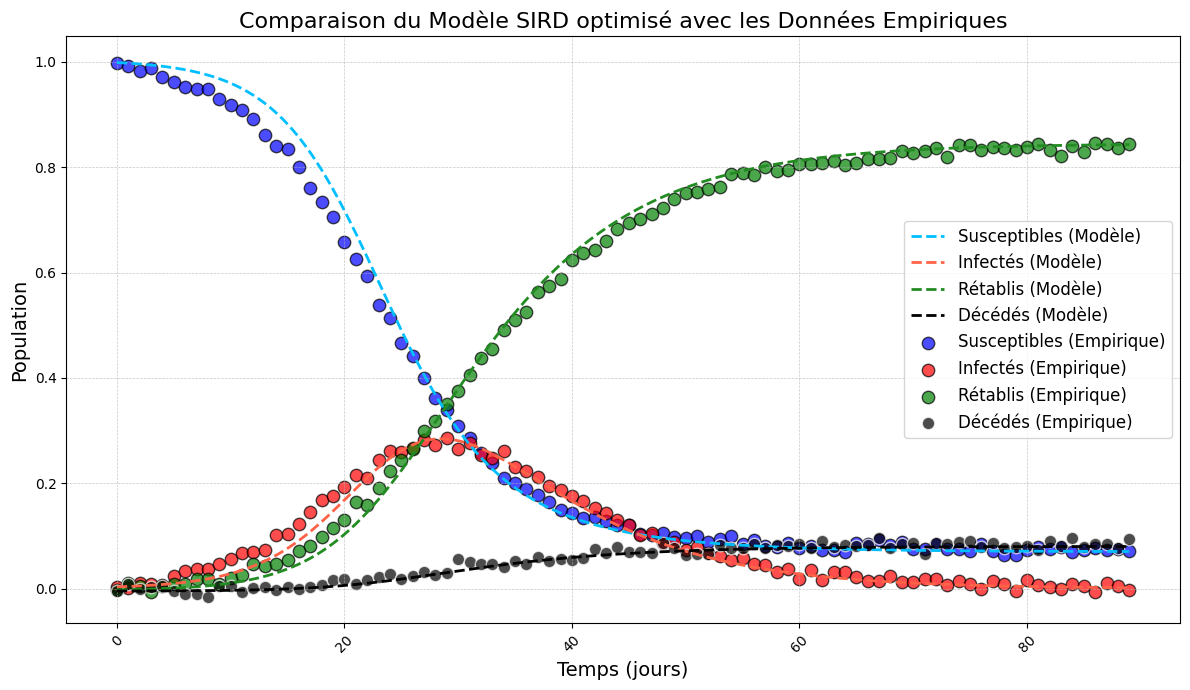

In [55]:
#4 Visualisation
# Simulation SIRD et extraction des données
S0, I0, R0, D0 = empirical_data.iloc[0]['S'], empirical_data.iloc[0]['I'], empirical_data.iloc[0]['R'], empirical_data.iloc[0]['D']
T = empirical_data['Jour'].max()
time, S, I, R, D = euler_sird(beta_opt, gamma_opt, mu_opt, S0, I0, R0, D0, dt=0.1, T=T)

# Amélioration du visuel
plt.figure(figsize=(12, 7))
plt.plot(time, S, label="Susceptibles (Modèle)", color="deepskyblue", linestyle="--", linewidth=2)
plt.plot(time, I, label="Infectés (Modèle)", color="tomato", linestyle="--", linewidth=2)
plt.plot(time, R, label="Rétablis (Modèle)", color="forestgreen", linestyle="--", linewidth=2)
plt.plot(time, D, label="Décédés (Modèle)", color="black", linestyle="--", linewidth=2)

# Ajout des points empiriques
plt.scatter(empirical_data['Jour'], empirical_data['S'], label="Susceptibles (Empirique)", color="blue", marker="o", s=80, edgecolors='black', alpha=0.7)
plt.scatter(empirical_data['Jour'], empirical_data['I'], label="Infectés (Empirique)", color="red", marker="o", s=80, edgecolors='black', alpha=0.7)
plt.scatter(empirical_data['Jour'], empirical_data['R'], label="Rétablis (Empirique)", color="green", marker="o", s=80, edgecolors='black', alpha=0.7)
plt.scatter(empirical_data['Jour'], empirical_data['D'], label="Décédés (Empirique)", color="black", marker="o", s=80, edgecolors='white', alpha=0.7)

# Ajout de labels, titre et légende
plt.xlabel("Temps (jours)", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.title("Comparaison du Modèle SIRD optimisé avec les Données Empiriques", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Rotation des labels sur l'axe des X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage
plt.tight_layout()  # Ajuste la mise en page pour éviter les coupures
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

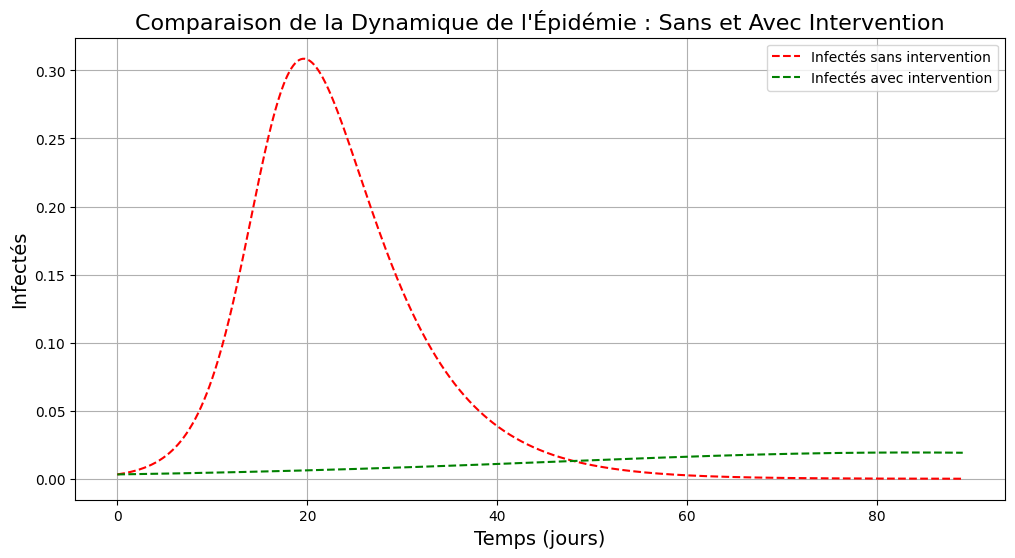

In [56]:
# Simulation sans intervention
time, S_no_interv, I_no_interv, R_no_interv, D_no_interv = euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt=0.1, T=T)

# Simulation avec intervention (réduction de beta)
beta_interv = 0.2  # Réduction de beta
time, S_interv, I_interv, R_interv, D_interv = euler_sird(beta_interv, gamma, mu, S0, I0, R0, D0, dt=0.1, T=T)

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(time, I_no_interv, label="Infectés sans intervention", color="red", linestyle="--")
plt.plot(time, I_interv, label="Infectés avec intervention", color="green", linestyle="--")

plt.xlabel("Temps (jours)", fontsize=14)
plt.ylabel("Infectés", fontsize=14)
plt.title("Comparaison de la Dynamique de l'Épidémie : Sans et Avec Intervention", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()